In [65]:
import numpy as np
import scipy.stats as spst
from matplotlib import pyplot
from statistics import mean
import math

In [66]:
def generate_sample(n):
    return np.random.normal(0, 1, n)

sample1 = generate_sample(10)
sample1

array([ 0.67707924,  0.86487927,  0.25942267, -0.03484179,  1.58592831,
       -1.76474256,  0.12432761,  0.71271993, -0.47559422,  0.62487576])

In [67]:
region_borders = ["-inf"] + [i/2 for i in range(-4, 5)] + ["inf"]
region_borders

['-inf', -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 'inf']

In [68]:
norm = spst.norm(0, 1)

def chi_squared(O_k, n, p_k):
    return (O_k - n * p_k)**2 / (n * p_k)

def chi_squared_statistics(observations, left_border, right_border):
    O_k = 0
    n = len(observations)
    p_k = 0
    if (left_border == "-inf"):
        O_k = len(list(filter(lambda score: score <= right_border, observations)))
        p_k = norm.cdf(right_border)
    elif (right_border == "inf"):
        O_k = len(list(filter(lambda score: score >= left_border, observations)))
        p_k = 1 - norm.cdf(left_border)
    else:
        O_k = len(list(filter(lambda score: left_border <= score <= right_border, observations)))
        p_k = norm.cdf(right_border) - norm.cdf(left_border)
    return chi_squared(O_k, n, p_k)


def chi_squared_by_regions(sample):
    res = 0
    for i in range(len(region_borders) - 1):
        left_border = region_borders[i]
        right_border = region_borders[i + 1]
        res += chi_squared_statistics(sample, left_border, right_border)
    return res

bar1 = chi_squared_by_regions(sample1)

bar1

9.392975445907684

In [69]:
def check_st_norm_dist_chi_sq_H0(n):
    res = [0 for i in range(n)]
    for i in range(n):
        sample = generate_sample(100)
        res[i] = chi_squared_by_regions(sample)
    return res

check_st_norm_dist_chi_sq_H0(10)

[6.28346031349046,
 17.10303856627014,
 6.364092597429361,
 14.516226029255765,
 9.205346677598637,
 3.1739654075401633,
 12.02701351164233,
 3.9730198429487658,
 8.129154732353648,
 13.128743983458431]

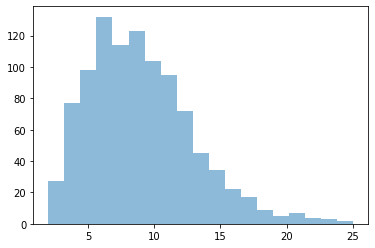

In [70]:
data = check_st_norm_dist_chi_sq_H0(1000)

bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),
                   20) # fixed number of bins

pyplot.hist(data, bins=bins, alpha=0.5)
pyplot.show()

In [71]:
mean(data)

8.984689139515888

$ P_{H_0} (t(x_1, ..., x_n) ∈ B_{crit}) = P(p < \alpha) = \alpha $
where t is  statistics of criterion and p is a P-value.

In [92]:
spst.chi2.ppf(0.95, 8)

15.50731305586545

As I know, the Chi-squared distribution is used for one-sided test, so our mean value (around 9) is in the confidence area (less than 15) for 0.95 quantile.

This mean we can not reject the null hypothesis.

Now I will alter number of breaks but in same area

In [124]:
def chi_squared_borders(sample, borders):
    res = 0
    if (borders == ["-inf", "inf"]):
        return 0
    for i in range(len(borders) - 1):
        left_border = borders[i]
        right_border = borders[i + 1]
        res += chi_squared_statistics(sample, left_border, right_border)
    return res

def chi_sq_H0_Pvalue(n, borders, n_df):
    res = []
    for i in np.arange(0, 1.01, 0.01):
        err = 0
        for j in range(n):
            sample = generate_sample(100)
            if (chi_squared_borders(sample, borders) > spst.chi2.ppf(i, n_df - 1)):
                err += 1
        res.append(err / n)
    return res[::-1]

def check_alpha1_err(n_df):
    borders = []
    if (n_df == 1):
        borders = []
    elif (n_df == 2):
        borders = [0]
    else:
        borders = np.arange(-2, 2 + (4 / (n_df - 2)), 4 / (n_df - 2)).tolist()
    borders = ["-inf"] + borders + ["inf"]
    return chi_sq_H0_Pvalue(100, borders, n_df)

# check_alpha1_err(3)

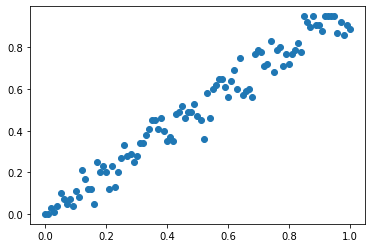

In [129]:
xs = np.arange(0, 1.01, 0.01)
ys = check_alpha1_err(2)
pyplot.scatter(xs, ys)

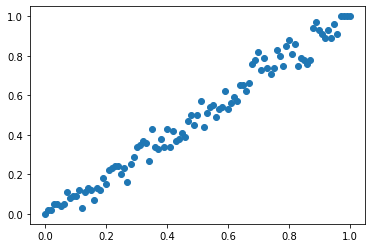

In [125]:
xs = np.arange(0, 1.01, 0.01)
ys = check_alpha1_err(3)
pyplot.scatter(xs, ys)

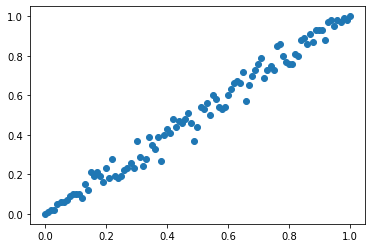

In [126]:
xs = np.arange(0, 1.01, 0.01)
ys = check_alpha1_err(5)
pyplot.scatter(xs, ys)

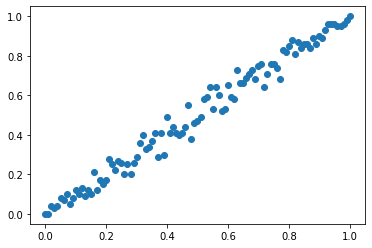

In [127]:
xs = np.arange(0, 1.01, 0.01)
ys = check_alpha1_err(10)
pyplot.scatter(xs, ys)

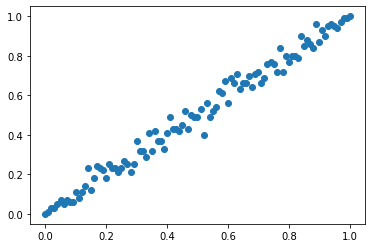

In [128]:
xs = np.arange(0, 1.01, 0.01)
ys = check_alpha1_err(20)
pyplot.scatter(xs, ys)

Nothing changes, even when the df = 3